In [ ]:
# Import statements
import nltk
nltk.download("inaugural")
from nltk.corpus import inaugural
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.corpus import state_union
nltk.download("state_union")
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import numpy as np

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Unzipping corpora/state_union.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Gathering all the stopwords, which will be taken out of corpora data,
# in order to simplify the sentiment analysis.
stop_words = str(stopwords.words("english"))
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Subsecting the Inaugural address files to analyze comparatively — to see how sentiment changes president-to-president.
inaugural_fileids = inaugural.fileids()[40:55]
inaugural_fileids

['1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1977-Carter.txt',
 '1981-Reagan.txt',
 '1985-Reagan.txt',
 '1989-Bush.txt',
 '1993-Clinton.txt',
 '1997-Clinton.txt',
 '2001-Bush.txt',
 '2005-Bush.txt']

In [ ]:
# To account for the difference in presidents between the Inaugural and State of the Union data,
# the indices of that needed to be extracted are shown below (state_of_the_union_fileids_indices).
state_of_the_union_fileids_comparative = []
state_of_the_union_fileids_indices = [4, 7, 11, 15, 20, 26, 29, 34, 37, 41, 45, 50, 54, 58, 63]

# A for loop is used to populate the list of fileids for the State of the Union address.
for l in state_of_the_union_fileids_indices:
  state_of_the_union_fileids_comparative.append(state_union.fileids()[l])

print(state_of_the_union_fileids_comparative)

['1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson-1.txt', '1970-Nixon.txt', '1973-Nixon.txt', '1978-Carter.txt', '1981-Reagan.txt', '1985-Reagan.txt', '1989-Bush.txt', '1993-Clinton.txt', '1997-Clinton.txt', '2001-GWBush-1.txt', '2005-GWBush.txt']


In [ ]:
# Empty lists and strings to extract the words from the Inaugural addresses,
# the years, the president names, and the year and president name, together, respectively.
inaugural_words = []
inaugural_year = ""
inaugural_president = ""
inaugural_info = []

for fileids in inaugural_fileids:
  inag_file_words = inaugural.words(fileids)
  # Obtaining the last 4 characters of the fileid — the year.
  inaugural_year = fileids[:4]
  # # Collecting the names of the preseidents by checking the fileids against a
  # regular expression, and then getting the name by grouping the name — (\w+).
  pres = re.match(r"\d+-(\w+)\.txt", fileids)
  if pres:
    inaugural_president = pres.group(1)
  # Putting the president name and year together (current), using a F-string,
  # and adding that to the list of presidential information (inaugural_info).
  current = f"{inaugural_president} ({inaugural_year})"
  inaugural_info.append(current)
  # Populating the list of Statue of the Union addresses by looping through the
  # the files one at a time and adding the words, so long as they are not stop words.
  precursor = []
  for i in range(len(inag_file_words)):
    if inag_file_words[i].lower().isalpha() and inag_file_words[i].lower() not in stop_words:
      precursor.append(inag_file_words[i].lower())
  output = " ".join(precursor)
  inaugural_words.append(output)

inaugural_words

['mr vice president mr chief justice fellow citizens accept humility honor american people conferred upon accept deep resolve welfare nation peace world performing duties office help prayers every one ask encouragement support tasks face difficult accomplish work together period national history special challenges confront momentous past today marks beginning new administration period eventful perhaps decisive world may lot experience large measure bring major turning point long history human race first half century marked unprecedented brutal attacks rights man two frightful wars history supreme time men learn live together peace harmony peoples earth face future grave uncertainty composed almost equally great hopes great fears time doubt look united states never good strength wise leadership fitting therefore take occasion proclaim world essential principles faith live declare aims peoples american people stand firm faith inspired nation beginning believe men right equal justice law 

In [ ]:
# A list to collect all of the words from the State of the Union addresses.
state_union_words_comp = []

# Populating the list of State of the Union address words, like shown above.
for fileids in state_of_the_union_fileids_comparative:
  state_uni_file_words_comp = state_union.words(fileids)
  precursor = []
  for i in range(len(state_uni_file_words_comp)):
    if state_uni_file_words_comp[i].lower().isalpha() and state_uni_file_words_comp[i].lower() not in stop_words:
      precursor.append(state_uni_file_words_comp[i].lower())
  output = " ".join(precursor)
  state_union_words_comp.append(output)


state_union_words_comp

['president harry truman annual message congress state union january mr president mr speaker members congress happy report congress state union good nation better able ever meet needs american people give fair chance pursuit happiness great republic foremost among nations world search peace last years people creating society offers new opportunities every man enjoy share good things life society conservative values principles cherish forward looking protecting values principles extending benefits rejected discredited theory fortunes nation hands privileged abandoned trickle concept national prosperity instead believe economic system rest democratic foundation wealth created benefit recent election shows people united states favor kind society want go improving american people decided poverty wasteful unnecessary preventable disease pledged common resources help one another hazards struggles individual life believe unfair prejudice artificial distinction bar citizen united states americ

In [ ]:
# Initializing the NLTK SentimentIntensityAnalyzer().
vader_sentiment_analyzer = SentimentIntensityAnalyzer()

# Empty lists of sentiments to be populated,
# both for the Inaugural and State of the Union Addresses.
compound_comp_inag = []
pos_comp_inag = []
neg_comp_inag = []
neu_comp_inag = []

compound_comp_state_uni = []
pos_comp_state_uni = []
neg_comp_state_uni = []
neu_comp_state_uni = []

# Looping through the words in the Inaugural and State of the Union addresses,
# and extracting the corresponding SentimentIntensityAnalyzer() value.
for text in inaugural_words:
  s = vader_sentiment_analyzer.polarity_scores(text)
  compound_comp_inag.append(float(s['compound']))
  pos_comp_inag.append(float(s['pos']))
  neg_comp_inag.append(float(s['neg']))
  neu_comp_inag.append(float(s['neu']))

for text in state_union_words_comp:
  s = vader_sentiment_analyzer.polarity_scores(text)
  compound_comp_state_uni.append(float(s['compound']))
  pos_comp_state_uni.append(float(s['pos']))
  neg_comp_state_uni.append(float(s['neg']))
  neu_comp_state_uni.append(float(s['neu']))



print(compound_comp_inag)
print(pos_comp_inag)
print(neg_comp_inag)
print(neu_comp_inag)
print("\n")
print(compound_comp_state_uni)
print(pos_comp_state_uni)
print(neg_comp_state_uni)
print(neu_comp_state_uni)

[0.9999, 0.9999, 0.9999, 0.9988, 0.9989, 0.9998, 0.9999, 0.9997, 0.9998, 0.9999, 0.9999, 0.9993, 0.9998, 0.9997, 0.9999]
[0.399, 0.386, 0.412, 0.29, 0.277, 0.319, 0.391, 0.419, 0.319, 0.352, 0.395, 0.274, 0.316, 0.347, 0.386]
[0.108, 0.108, 0.103, 0.163, 0.144, 0.115, 0.086, 0.111, 0.112, 0.106, 0.052, 0.11, 0.085, 0.131, 0.113]
[0.494, 0.506, 0.485, 0.546, 0.579, 0.566, 0.522, 0.47, 0.569, 0.542, 0.552, 0.616, 0.599, 0.522, 0.501]


[0.9999, 1.0, 0.9999, 0.9999, 0.9999, 0.9999, 0.9994, 0.9999, 0.9999, 1.0, 1.0, 0.9999, 1.0, 1.0, 1.0]
[0.298, 0.286, 0.306, 0.253, 0.303, 0.279, 0.262, 0.29, 0.238, 0.346, 0.315, 0.256, 0.25, 0.376, 0.346]
[0.079, 0.084, 0.096, 0.13, 0.119, 0.127, 0.08, 0.135, 0.086, 0.083, 0.107, 0.118, 0.096, 0.086, 0.12]
[0.622, 0.631, 0.598, 0.617, 0.578, 0.593, 0.658, 0.575, 0.676, 0.572, 0.578, 0.626, 0.654, 0.538, 0.534]


In [ ]:
# Formatting all the data into a Pandas DataFrame.
data_comparative = {
    "presidential information": inaugural_info,
    "inaugural speech": inaugural_words,
    "inaugural negative sentiment": neg_comp_inag,
    "inaugural neutral sentiment": neu_comp_inag,
    "inaugural positive sentiment": pos_comp_inag,
    "inaugural compound sentiment": compound_comp_inag,
    "state of the union speech": state_union_words_comp,
    "state of the union negative sentiment": neg_comp_state_uni,
    "state of the union neutral sentiment": neu_comp_state_uni,
    "state of the union positive sentiment": pos_comp_state_uni,
    "state of the union compound sentiment": compound_comp_state_uni,
    }
df_comparative_sentiment = pd.DataFrame.from_dict(data_comparative)

In [ ]:
# Displaying some of the DataFrame, using .head().
df_comparative_sentiment.head()

,presidential information,inaugural speech,inaugural negative sentiment,inaugural neutral sentiment,inaugural positive sentiment,inaugural compound sentiment,state of the union speech,state of the union negative sentiment,state of the union neutral sentiment,state of the union positive sentiment,state of the union compound sentiment
0,Truman (1949),mr vice president mr chief justice fellow citi...,0.108,0.494,0.399,0.9999,president harry truman annual message congress...,0.079,0.622,0.298,0.9999
1,Eisenhower (1953),friends begin expression thoughts deem appropr...,0.108,0.506,0.386,0.9999,president dwight eisenhower annual message con...,0.084,0.631,0.286,1.0000
2,Eisenhower (1957),price peace mr chairman mr vice president mr c...,0.103,0.485,0.412,0.9999,president dwight eisenhower annual message con...,0.096,0.598,0.306,0.9999
3,Kennedy (1961),vice president johnson mr speaker mr chief jus...,0.163,0.546,0.290,0.9988,president john kennedy special message congres...,0.130,0.617,0.253,0.9999
4,Johnson (1965),fellow countrymen occasion oath taken god mine...,0.144,0.579,0.277,0.9989,president lyndon johnson annual message congre...,0.119,0.578,0.303,0.9999


In [ ]:
# Using .melt() to extract the relevant data to compare the negative sentiment
# of the Inaugural and State of the Union addresses.
composite_neg = pd.melt(
     df_comparative_sentiment,
     id_vars = "presidential information",
     value_vars = ["inaugural negative sentiment", "state of the union negative sentiment"]
     )
composite_neg.head()

,presidential information,variable,value
0,Truman (1949),inaugural negative sentiment,0.108
1,Eisenhower (1953),inaugural negative sentiment,0.108
2,Eisenhower (1957),inaugural negative sentiment,0.103
3,Kennedy (1961),inaugural negative sentiment,0.163
4,Johnson (1965),inaugural negative sentiment,0.144


<Axes: xlabel='value', ylabel='presidential information'>

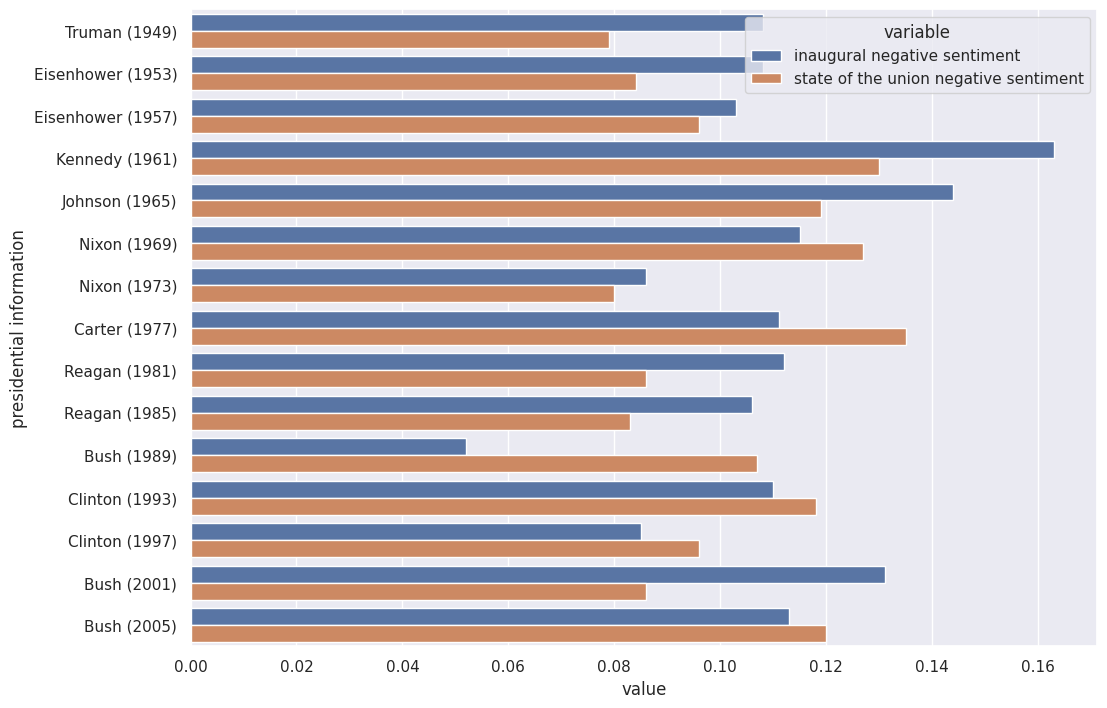

In [ ]:
# Using Seaborn to plot the negative sentiment data, using a barplot.
sns.barplot(
    data = composite_neg,
    x = "value",
    y = "presidential information",
    hue = "variable",
)

In [ ]:
# Using .melt() to extract the relevant data to compare the neutral sentiment
# of the Inaugural and State of the Union addresses, like shown above.
composite_neu = pd.melt(
     df_comparative_sentiment,
     id_vars = "presidential information",
     value_vars = ["inaugural neutral sentiment", "state of the union neutral sentiment"]
     )
composite_neu.head()

,presidential information,variable,value
0,Truman (1949),inaugural neutral sentiment,0.494
1,Eisenhower (1953),inaugural neutral sentiment,0.506
2,Eisenhower (1957),inaugural neutral sentiment,0.485
3,Kennedy (1961),inaugural neutral sentiment,0.546
4,Johnson (1965),inaugural neutral sentiment,0.579


<Axes: xlabel='value', ylabel='presidential information'>

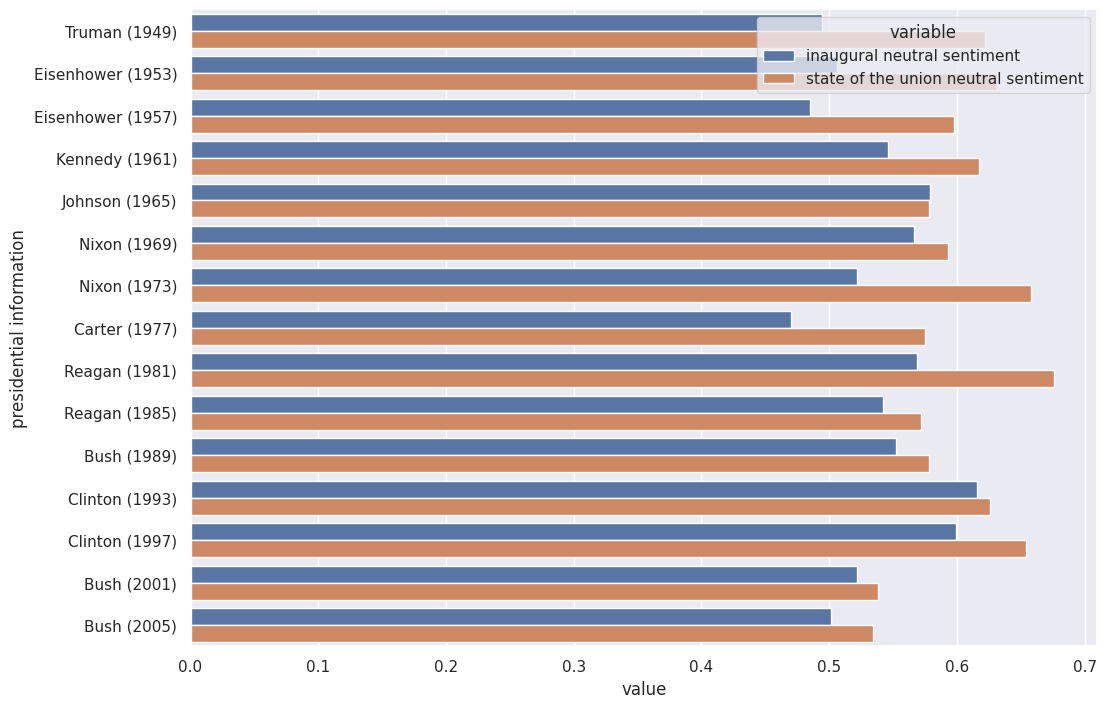

In [ ]:
# Using Seaborn to plot the neutral sentiment data, using a barplot.
sns.barplot(
    data = composite_neu,
    x = "value",
    y = "presidential information",
    hue = "variable",
)

In [ ]:
# Using .melt() to extract the relevant data to compare the positive sentiment
# of the Inaugural and State of the Union addresses, like shown above.
composite_pos = pd.melt(
     df_comparative_sentiment,
     id_vars = "presidential information",
     value_vars = ["inaugural positive sentiment", "state of the union positive sentiment"]
     )
composite_pos.head()

,presidential information,variable,value
0,Truman (1949),inaugural positive sentiment,0.399
1,Eisenhower (1953),inaugural positive sentiment,0.386
2,Eisenhower (1957),inaugural positive sentiment,0.412
3,Kennedy (1961),inaugural positive sentiment,0.290
4,Johnson (1965),inaugural positive sentiment,0.277


<Axes: xlabel='value', ylabel='presidential information'>

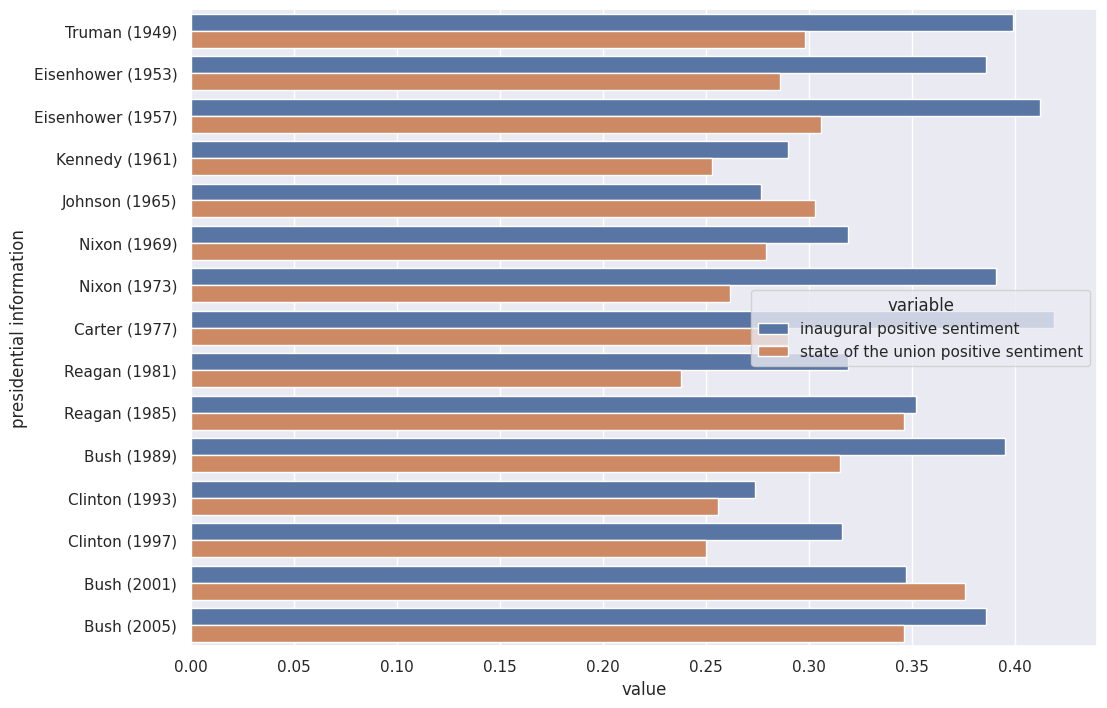

In [ ]:
# Using Seaborn to plot the positive sentiment data, using a barplot.
sns.barplot(
    data = composite_pos,
    x = "value",
    y = "presidential information",
    hue = "variable",
)

In [ ]:
# Using .melt() to extract the relevant data to compare the compound sentiment
# of the Inaugural and State of the Union addresses, like shown above.
composite_compound = pd.melt(
     df_comparative_sentiment,
     id_vars = "presidential information",
     value_vars = ["inaugural compound sentiment", "state of the union compound sentiment"]
     )
composite_compound.head()

,presidential information,variable,value
0,Truman (1949),inaugural compound sentiment,0.9999
1,Eisenhower (1953),inaugural compound sentiment,0.9999
2,Eisenhower (1957),inaugural compound sentiment,0.9999
3,Kennedy (1961),inaugural compound sentiment,0.9988
4,Johnson (1965),inaugural compound sentiment,0.9989


<Axes: xlabel='value', ylabel='presidential information'>

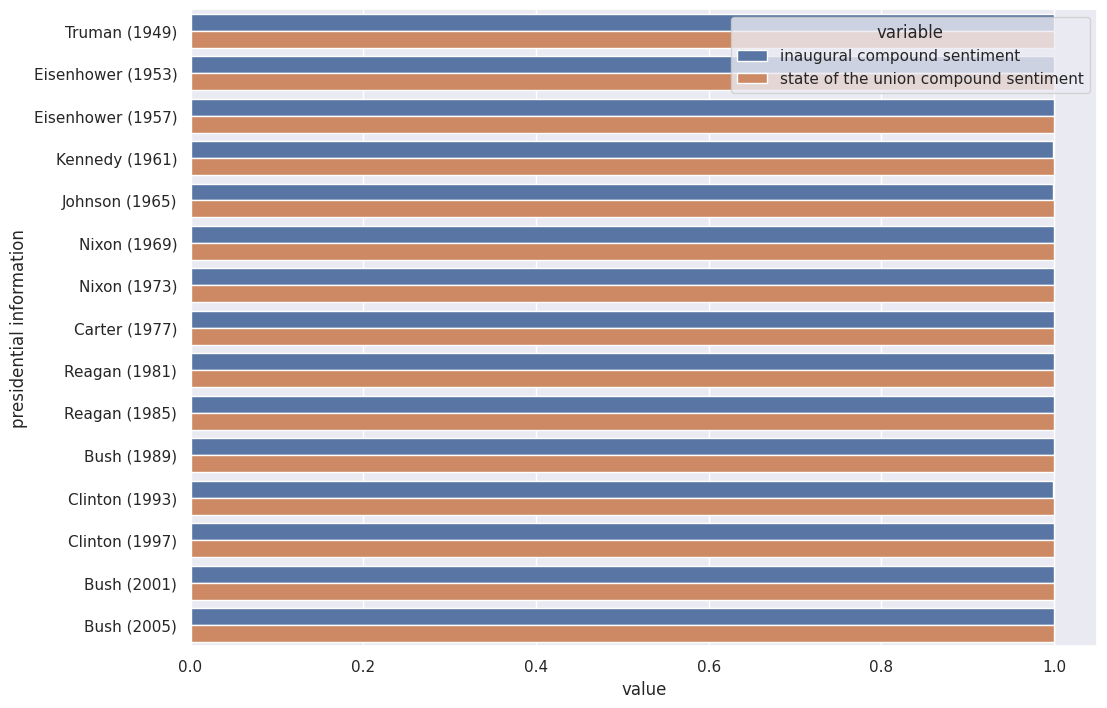

In [ ]:
# Using Seaborn to plot the compound sentiment data, using a barplot.
sns.barplot(
    data = composite_compound,
    x = "value",
    y = "presidential information",
    hue = "variable",
)